# Part1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import networkx as nx

In [3]:
# toroidal

In [4]:
def create_toroidal(k):
    G=nx.Graph()
    count = 0
    mapping1 = {}
    mapping2 = {}
    for i in range(k):
        for j in range(k):
            mapping1[count] = (i,j)
            mapping2[(i,j)] = count
            G.add_node(count)
            count +=1
    for i in range(k):
        for j in range(k):
            if (i,j+1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j+1])
            if (i,j-1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j-1])
            if (i+1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i+1,j])
            if (i-1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i-1,j])  
    j = 0
    for i in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i,j+k-1])
    i = 0
    for j in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i+k-1,j])
    return G, mapping1, mapping2

In [5]:
k = 20
G, mapping1,mapping2 = create_toroidal(k)

/Users/danqing0703/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/danqing0703/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


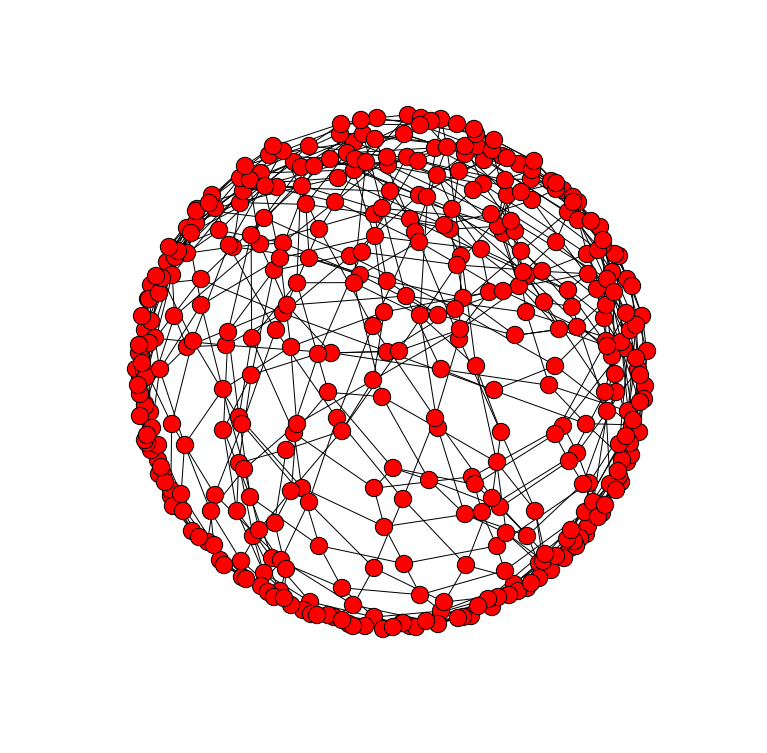

In [6]:
plt.figure(figsize=(10,10))
nx.draw(G)
plt.show()

# Part2

In [7]:
#✓st = 0.25 for all edges, and ✓s = ( 1)s for all s 2 {1,...,49} (using the node ordering in Figure 1(a)).

$\tau$

In [8]:
from __future__ import division
import copy

In [9]:
for edge in G.edges():
    G[edge[0]][edge[1]]['weight'] = 0.25
thetas = []
for v in G.nodes():
    thetas.append((-1)**(v-1))

In [13]:
def naive_mean_field(epsilon, G, thetas):
    N = G.number_of_nodes()
    taus = np.ones(N)
    taus[np.random.choice(N, int(N/2), replace=False)]=-1
    dif = 100
    iteration = 0
    while dif > epsilon:
        taus_old = copy.copy(taus)
        for v in G.nodes():
            beta = thetas[v]
            for u in G.neighbors(v):
                beta += G[u][v]['weight']*taus[u]
            taus[v] = (np.exp(2*beta)-1)/(1 +np.exp(2*beta))
        dif = np.linalg.norm(taus-taus_old)
        print iteration, dif
        iteration += 1
    return taus

In [15]:
taus = naive_mean_field(10**(-15),G, thetas)

0 23.209472463
1 3.22684733404
2 0.551663924367
3 0.10695168932
4 0.0221234905412
5 0.00469959242906
6 0.00102763558163
7 0.000229759065221
8 5.23797957969e-05
9 1.21483969018e-05
10 2.86144504734e-06
11 6.83158524708e-07
12 1.65027110706e-07
13 4.02104576117e-08
14 9.85289668775e-09
15 2.42108789945e-09
16 5.95360064443e-10
17 1.46483565064e-10
18 3.61457426522e-11
19 8.97468874659e-12
20 2.24521960299e-12
21 5.64912426349e-13
22 1.42748217911e-13
23 3.61281652371e-14
24 8.7623257638e-15
25 2.69443602974e-15
26 9.67869993827e-16


# Part3 embedding mean field inference

In [17]:
# from Discriminative Embeddings of Latent Variable Models for Structured Data

In [18]:
import scipy

In [36]:
def embedding_mean_field(d, epsilon, G, thetas):
    N = G.number_of_nodes()
    mus = np.zeros((N,d))
    W1 = np.random.rand(d,1)
    W2 = np.random.rand(d,d)
    dif = 1000
    i = 0
    while dif > epsilon:
        mus_old = copy.copy(mus)
        for v in G.nodes():
            l = np.sum(mus_old[G.neighbors(v)],axis=0)
            mus[v] = scipy.special.expit((W1*thetas[v]).flatten()+W2.dot(l))   
        dif = np.linalg.norm(mus-mus_old)
        print i, dif
        i += 1
    return mus

In [37]:
A = embedding_mean_field(1, 10**(-200), G, thetas)

0 10.4042163471
1 2.02517780355
2 0.398950344286
3 0.0773638036566
4 0.0149455701474
5 0.0028850818854
6 0.000556852109017
7 0.000107475441694
8 2.07432223779e-05
9 4.00352686777e-06
10 7.72696923489e-07
11 1.49133633517e-07
12 2.87833953387e-08
13 5.55531135017e-09
14 1.07219815523e-09
15 2.06939682813e-10
16 3.99398281005e-11
17 7.70846210911e-12
18 1.48732949229e-12
19 2.86398809025e-13
20 5.49532360539e-14
21 1.16705512152e-14
22 3.14018491737e-15
23 0.0


# Part4 Discriminative Embedding

In [254]:
# classification problem, each node in the structure represent a vector